# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Mayang Gumelar]
- **Email:** [gumelarmayang@gmail.com]
- **ID Dicoding:** [mayanggumelarr]

## Menentukan Pertanyaan Bisnis

1. Trend peminjaman setiap bulan baik dari casual maupun register?
2. Perbandingan peminjaman di hari biasa dan hari weekend?
3. Trend musim untuk peminjaman sepeda terbanyak dan tersedikit?
4. Di jam2 berapa peminjaman paling ramai dan paling sepi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [2]:
# data perhari
day_data = pd.read_csv("dataset/day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# data perjam
hour_data = pd.read_csv("dataset/hour.csv")
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- data rental per-hari disimpan dalam bentuk dataframe dan ditampung dalam variabel day_data 
- data rental per-jam disimpan dalam bentuk dataframe dan ditampung dalam variabel hour_data
- terdapat perbedaan panjang data (banyak kolom) antara keduanya, ini karena pada hour_date terdapat kolom tambahan untuk 'jam'

### Assessing Data

In [4]:
# day_data info
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# statistik deskriptif day_data
print(f"Duplikasi data peminjaman perhari: {day_data.duplicated().sum()}")
day_data.describe(include="all")

Duplikasi data peminjaman perhari: 0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1/1/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [6]:
# hour_data info
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# statistik deskriptif hour_data
print(f"Duplikasi data peminjaman perhari: {hour_data.duplicated().sum()}")
hour_data.describe(include="all")

Duplikasi data peminjaman perhari: 0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,12/31/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- date_data terdiri dari 731 sampel, 16 feature, tidak ada missing values, tidak ada duplikasi
- hour_data terdiri dari 17.379 sampel, 17 feature, tidak ada missing values, tidak ada duplikasi
- feature dtday di kedua tabel masih bertipe data objek, seharusnya datetime
- semua nilai pada feature akurat dan tidak ada yang tidak masuk akal

### Cleaning Data

In [8]:
# cleaning data day_data
# konversi format dtday dari objek ke format datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

In [9]:
day_data.dteday.info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


In [10]:
# cleaning data hour_data
# konversi format dtday dari objek ke format datetime
hour_data['dteday'] = pd.to_datetime(day_data['dteday'])

In [11]:
hour_data.dteday.info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


In [12]:
# save data bersih
day_data.to_csv('day_clean.csv')
hour_data.to_csv('hour_clean.csv')

**Insight:**
- format object dteday pada data_day telah dirubah ke format datetime
- format object dteday pada hour_day telah dirubah juga ke format datetime
- tidak ada proses cleaning lain karena data terhitung bersih

## Exploratory Data Analysis (EDA)

### Explore Trend Perentalan Berdasarkan Bulan (Tahun 1 dan 2)

In [13]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [87]:
# Mencari trend peminjaman pertahun (casual dan registered)
print("Trend Perentalan (Tahun): ")
all_year = day_data.groupby("yr").agg({
    'casual':'sum',
    'registered':'sum',
    'cnt': 'sum'
}).reset_index()

all_year.sort_values(by='cnt', ascending=False)

Trend Perentalan (Tahun): 


,yr,casual,registered,cnt
1,1,372765,1676811,2049576
0,0,247252,995851,1243103


In [89]:
# Mencari trend peminjaman pertahun (casual dan registered)
print("Trend Perentalan All Years (Bulan): ")
all_year = day_data.groupby("mnth").agg({
    'casual':'sum',
    'registered':'sum',
    'cnt': 'sum'
}).reset_index()

all_year.sort_values(by='cnt', ascending=False)

Trend Perentalan All Years (Bulan): 


,mnth,casual,registered,cnt
7,8,72039,279155,351194
5,6,73906,272436,346342
8,9,70323,275668,345991
6,7,78157,266791,344948
4,5,75285,256401,331686
9,10,59760,262592,322352
3,4,60802,208292,269094
10,11,36603,218228,254831
2,3,44444,184476,228920
11,12,21693,189343,211036


In [52]:
year_1 = day_data[day_data['yr'] == 0]
year_2 = day_data[day_data['yr'] == 1]

In [70]:
print("Tred Perentalan tahun pertama: ")
year1 = year_1.groupby("mnth").agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
}).reset_index()

year1.sort_values(by='cnt', ascending=False)

Tred Perentalan tahun pertama: 


,mnth,casual,registered,cnt
5,6,30612,112900,143512
6,7,36452,104889,141341
7,8,28842,107849,136691
4,5,31050,104771,135821
8,9,26545,100873,127418
9,10,25222,98289,123511
10,11,15594,86573,102167
3,4,22346,72524,94870
11,12,8448,78875,87323
2,3,12826,51219,64045


In [69]:
print("Tred Perentalan tahun kedua: ")
year2 = year_2.groupby("mnth").agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
}).reset_index()
year2.sort_values(by='cnt', ascending=False)

Tred Perentalan tahun kedua: 


,mnth,casual,registered,cnt
8,9,43778,174795,218573
7,8,43197,171306,214503
6,7,41705,161902,203607
5,6,43294,159536,202830
9,10,34538,164303,198841
4,5,44235,151630,195865
3,4,38456,135768,174224
2,3,31618,133257,164875
10,11,21009,131655,152664
11,12,13245,110468,123713


### Explore Perbandingan Perentalan Weekday dan Weekend

In [56]:
week_rent = day_data.groupby("workingday").agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
})

print('Perentalan berdasarkan hari:')
week_rent

Perentalan berdasarkan hari:


,casual,registered,cnt
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


### Trend Perentalan Sepeda berdasarkan Musim

In [58]:
season = day_data.groupby("season").agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
})

print('Trend Perentalan Musiman:')
season.sort_values(by='cnt', ascending=False)

Trend Perentalan Musiman:


,casual,registered,cnt
season,,,
3,226091,835038,1061129
2,203522,715067,918589
4,129782,711831,841613
1,60622,410726,471348


### Jam-Jam Peminjaman Ramai dan Sepi?

In [60]:
hour_data.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [ ]:
hours = hour_data.groupby("hr").agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
})

print("Trend perentalan berdasarkan jam: ")
hours

Trend perentalan berdasarkan jam: 


,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171
8,15761,245240,261001


In [64]:
# Jam-jam paling ramai
X = hours.sort_values(by='cnt', ascending=False)
X.head()

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789


In [65]:
# Jam-jam paling sepi
Y = hours.sort_values(by='cnt', ascending=True)
Y.head()

,casual,registered,cnt
hr,,,
4,874,3554,4428
3,1893,6281,8174
5,1012,13249,14261
2,3412,12940,16352
1,4709,19455,24164


**Insight:**
`1. Question 1 (Trend perentalan perbulan):`
- Tahun pertama:
Perentalan terminim di awal tahun, mulai meningkat di pertengahan tahun, dan kembali menurun hingga akhir tahun.
- Tahun kedua:
Perentalan meningkat dri tahun sebelumnya, Terbukti di:
bulan 12 th 1 = 87323
bulan 1 th 2 = 96744
Perentalan terus meningkat hingga bulan ke-9 (218573) dan kembali menurun dari bulan ke-10 sampai 12.

`2. Question 2 (Perbandingan Perentalan Weekday VS Weekend):`
- Casual:
Perentalan casual lebih tinggi di weekend(316732) dibandingkan weekday(303285)
- Registered:
Perentalan terdaftar member lebih tinggi di weekday(1989125) dibandingkan weekend(683537)
- Overall:
Perentalan pada weekend 2x lipat lebih banyak dari weekend

`3. Question 3 (Trend Perentalan Musiman):`
Perentalan max-min berdasarkan musim:
- 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- 1 = Clear, Few clouds, Partly cloudy, Partly cloudy

`4. Question 4 (Jam-jam perentalan paling ramai dan paling sepi):`
- Jam2 perentalan paling ramai adalah: 17, 18, 8, 16, 19 (descending)
- Jam2 perentalan paling sepi: 4, 3, 5, 2, 1 (ascending)
Insight lain:
- Perentalan paling sedikit di jam 4 pagi, lalu terus meningkat hingga jam 8 pagi. Naik turun tapi tetap tinggi
  hingga jam 15 sore. 
- Peerentalan semakin meningkat dari jam 16 dan puncaknya jam 17, lalu menurun lagi hingga tengah malam.

`5. Perentalan di tahun kedua lebih tinggi dari tahun pertama`

## Visualization & Explanatory Analysis

### Pertanyaan 1: Trend Perentalan (Bulanan)

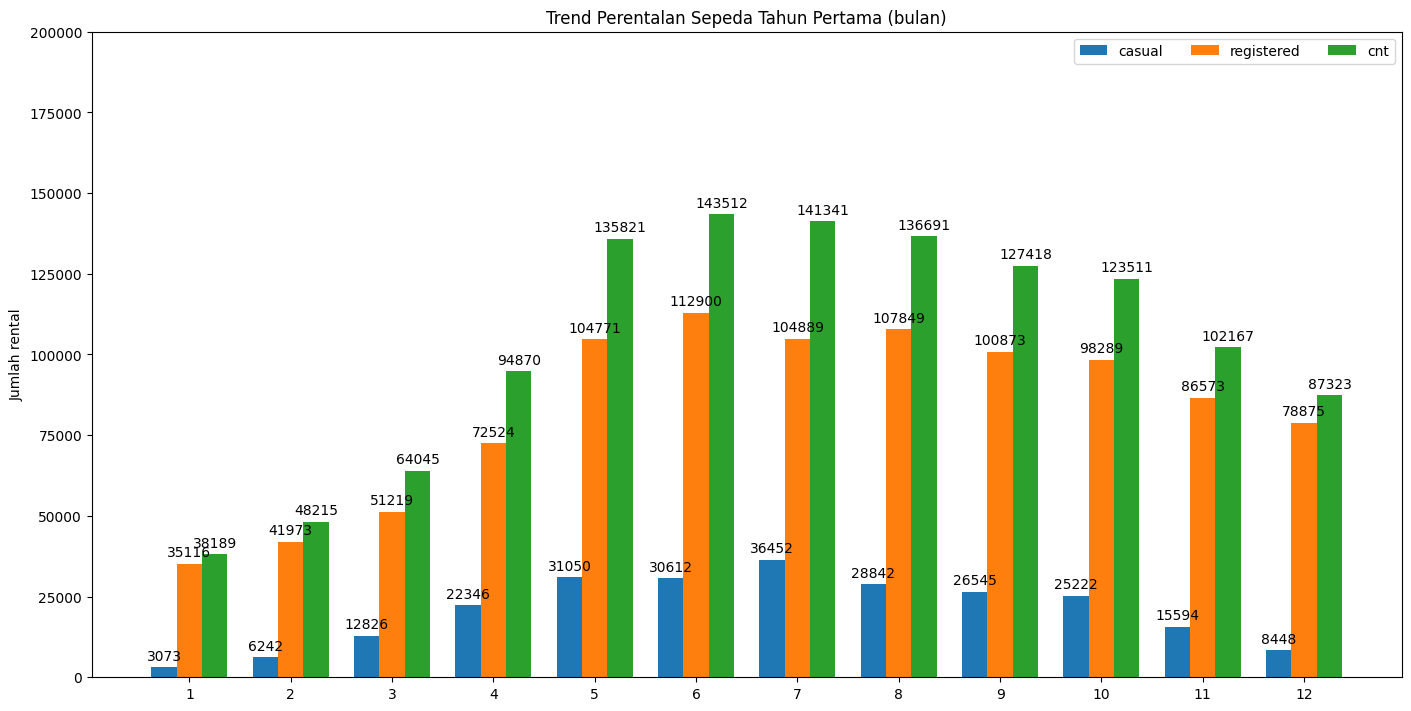

In [ ]:
month = year1['mnth']
renter = year1[['casual', 'registered', 'cnt']]

x = np.arange(len(month))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(14,7), layout='constrained')

for attribute, measurement in renter.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Jumlah rental')
ax.set_title('Trend Perentalan Sepeda Tahun Pertama (bulan)')
ax.set_xticks(x + width, month)
ax.legend(loc='best', ncols=3)
ax.set_ylim(0, 200000)

plt.show()

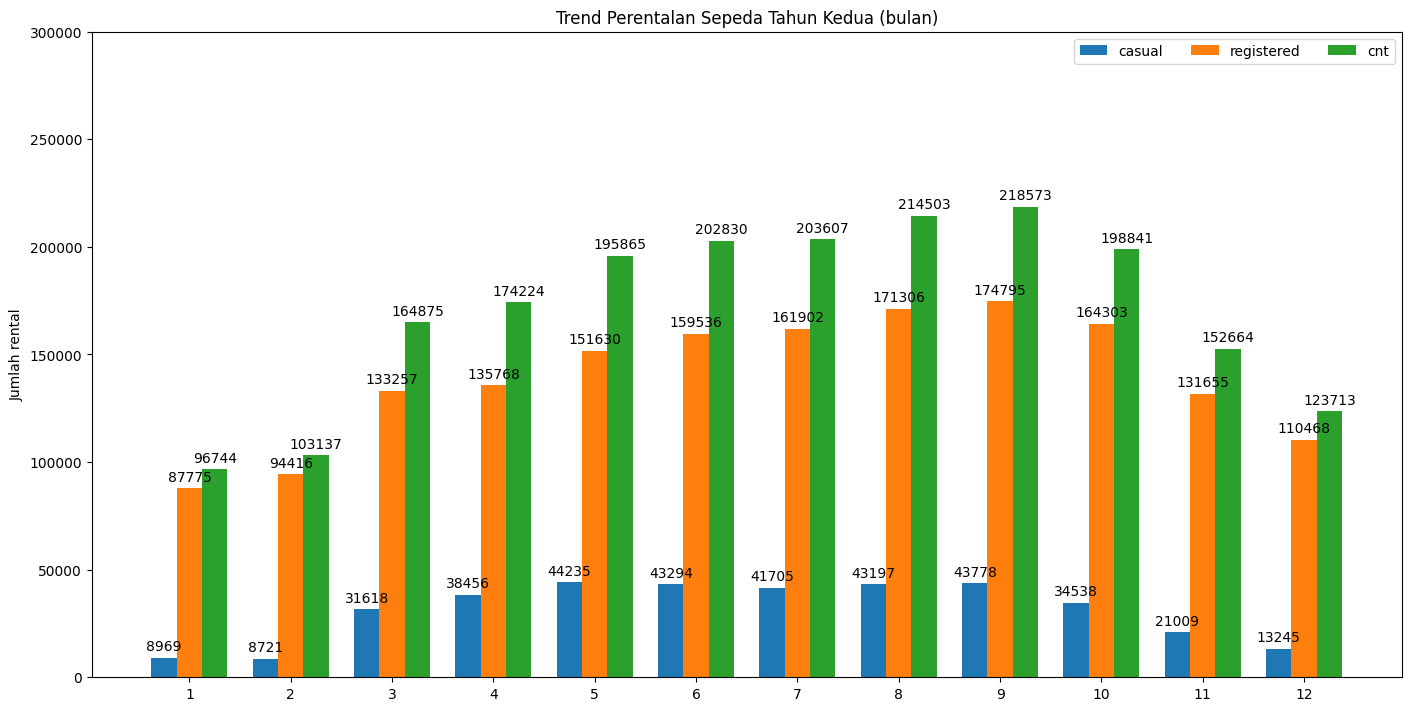

In [86]:
month = year2['mnth']
renter = year2[['casual', 'registered', 'cnt']]

x = np.arange(len(month))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(14,7), layout='constrained')

for attribute, measurement in renter.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Jumlah rental')
ax.set_title('Trend Perentalan Sepeda Tahun Kedua (bulan)')
ax.set_xticks(x + width, month)
ax.legend(loc='best', ncols=3)
ax.set_ylim(0, 300000)

plt.show()

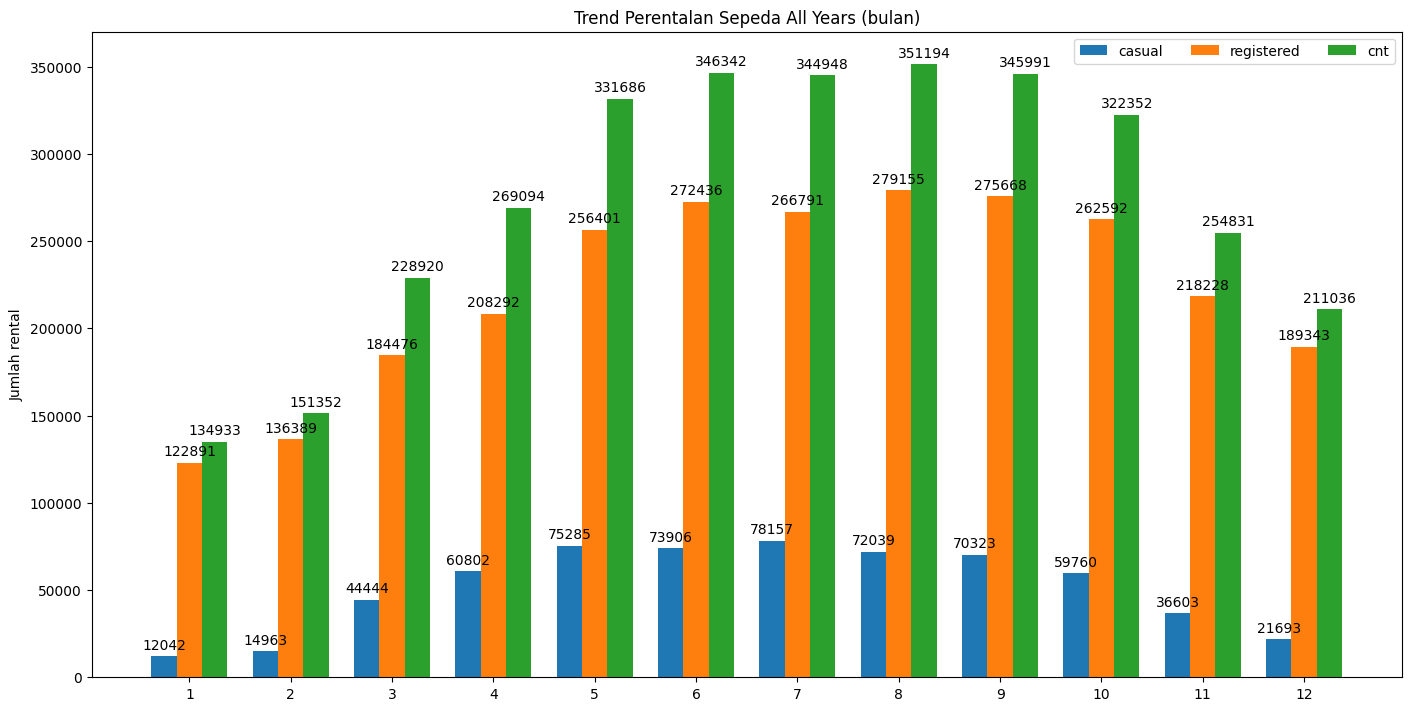

In [90]:
month = all_year['mnth']
renter = all_year[['casual', 'registered', 'cnt']]

x = np.arange(len(month))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(14,7), layout='constrained')

for attribute, measurement in renter.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Jumlah rental')
ax.set_title('Trend Perentalan Sepeda All Years (bulan)')
ax.set_xticks(x + width, month)
ax.legend(loc='best', ncols=3)
ax.set_ylim(0, 370000)

plt.show()

### Pertanyaan 2:

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2